<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/GSS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numeric Summary:
                year           age
count  72390.000000  71212.000000
mean    1997.715541     46.312209
std       15.109995     17.353604
min     1972.000000     18.000000
25%     1985.000000     32.000000
50%     1998.000000     44.000000
75%     2010.000000     60.000000
max     2022.000000     88.000000

Category Distribution for marital:
 marital
married                           37596
never married                     15904
divorced                           9642
widowed                            6756
separated                          2441
none                                 37
.s:  skipped on web                  12
.d:  do not know/cannot choose        2
Name: count, dtype: int64

Category Distribution for sex:
 sex
female                            40301
male                              31977
none                                 99
.d:  do not know/cannot choose        8
.s:  skipped on web                   5
Name: count, dtype: int64

Category Distribution

<ipython-input-4-bd6d1323cd1e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='happy', order=df['happy'].value_counts().index, palette='coolwarm')


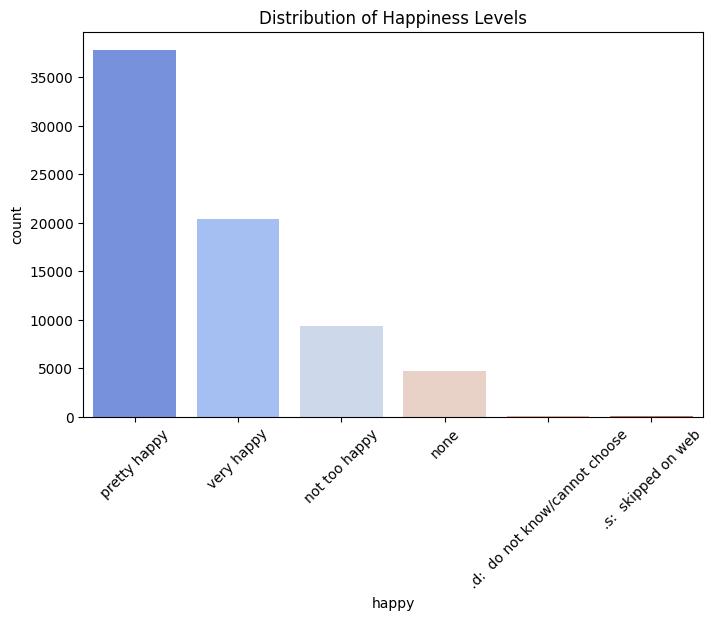

<ipython-input-4-bd6d1323cd1e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='health', y='happy', palette='coolwarm')


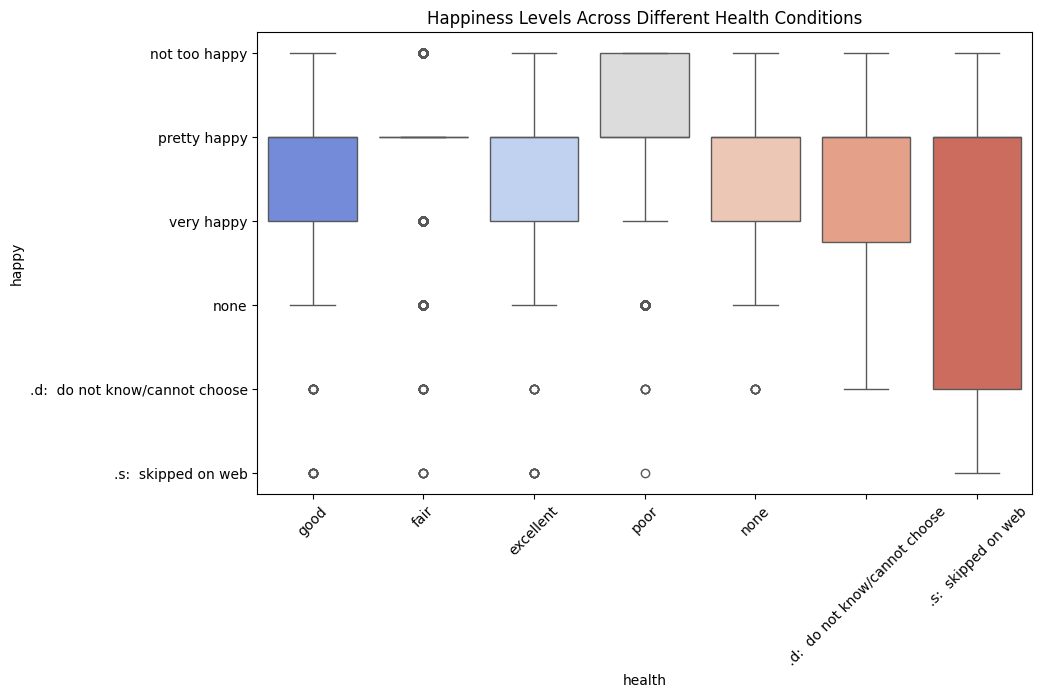

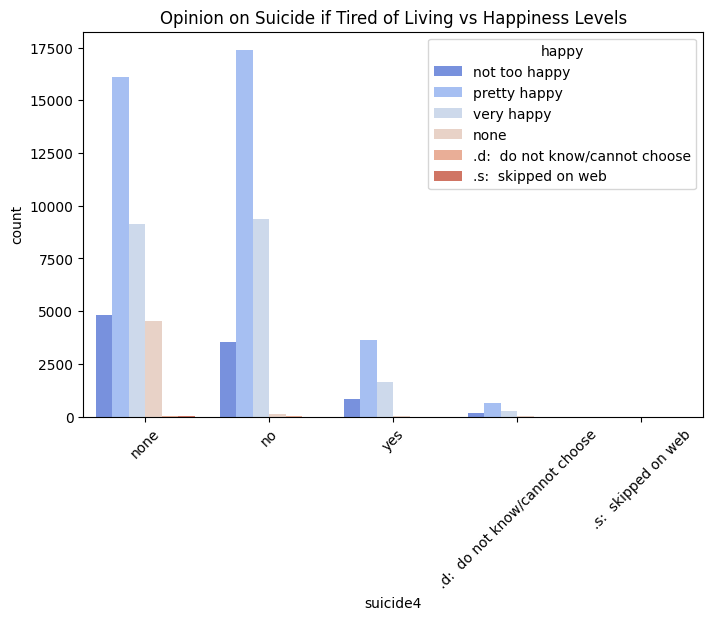

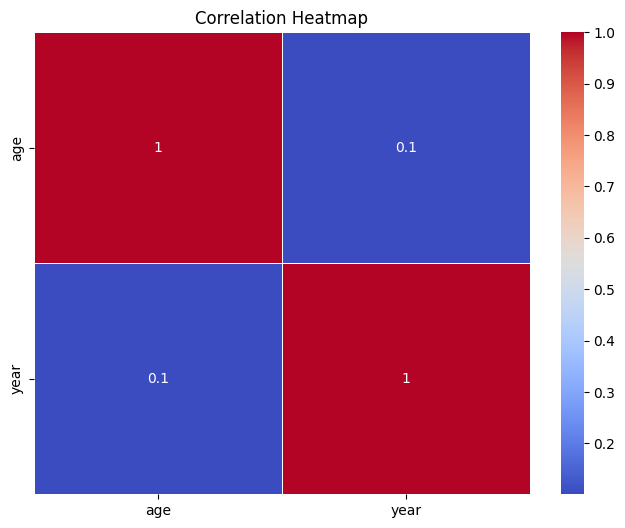

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/GSS.xlsx"
df = pd.read_excel(file_path)

# Data Cleaning

# Standardizing column names (lowercase, underscores instead of spaces)
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Handling missing or inapplicable values (replace '.i:  Inapplicable' and similar values with NaN)
df.replace({'.i:  Inapplicable': None, '.n:  No answer': None, ".d:  Don\\'t know": None}, inplace=True)

# Convert categorical variables to consistent format (strip whitespace, make lowercase)
categorical_columns = ['marital', 'sex', 'happy', 'health', 'suicide4', 'fefam']
for col in categorical_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Drop unnecessary ID column (not needed for analysis)
df.drop(columns=['id_'], inplace=True, errors='ignore')

# Convert numeric columns to correct type
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Exploratory Data Analysis (EDA)

# Summary statistics for numeric columns
numeric_summary = df.describe()
print("Numeric Summary:\n", numeric_summary)

# Frequency counts for categorical variables
categorical_columns = ['marital', 'sex', 'happy', 'health', 'suicide4', 'fefam']
categorical_summary = {col: df[col].value_counts(dropna=False) for col in categorical_columns}

for col, summary in categorical_summary.items():
    print(f"\nCategory Distribution for {col}:\n", summary)

# Visualization: Distribution of Happiness Levels
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='happy', order=df['happy'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Happiness Levels")
plt.xticks(rotation=45)
plt.show()

# Visualization: Health Condition vs Happiness
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='health', y='happy', palette='coolwarm')
plt.title("Happiness Levels Across Different Health Conditions")
plt.xticks(rotation=45)
plt.show()

# Visualization: Suicide Opinion vs Happiness
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='suicide4', hue='happy', palette='coolwarm')
plt.title("Opinion on Suicide if Tired of Living vs Happiness Levels")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap for Numeric Data
plt.figure(figsize=(8,6))
sns.heatmap(df[['age', 'year']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()